---

# Part II b

## More visualisations !

In [1]:
from IPython.display import YouTubeVideo
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

Adapted from Yann LeCun and Alfredo Canziani's course [Deep Learning with PyTorch](https://atcold.github.io/pytorch-Deep-Learning/) at NYU ([lesson 02](https://github.com/Atcold/pytorch-Deep-Learning/blob/master/02-space_stretching.ipynb)).

In [2]:
def set_default(figsize=(10, 10), dpi=100):
    return
    # plt.style.use(['dark_background', 'bmh'])
    plt.rc('axes') #, facecolor='k')
    plt.rc('figure') #, facecolor='k')
    plt.rc('figure', figsize=figsize, dpi=dpi)

def show_scatterplot(X, colors, title='', xlim=None, ylim=None):
    plt.figure()
    plt.grid()
    plt.axis('equal')
    plt.scatter(X[:, 0], X[:, 1], c=colors, s=5)
    if xlim:
        plt.xlim(xlim[0], xlim[1])
    if ylim:
        plt.ylim(ylim[0], ylim[1])
    plt.title(title, fontdict={'fontsize':8})
    # plt.axis('off')
    
def plot_bases(bases, width=0.04):
    bases = bases.numpy()
    bases[2:] -= bases[:2]
    plt.arrow(*bases[0], *bases[2], width=width, color=(1,0,0), zorder=10, alpha=1., length_includes_head=True)
    plt.arrow(*bases[1], *bases[3], width=width, color=(0,1,0), zorder=10, alpha=1., length_includes_head=True)    
    
set_default(figsize=(5,5))

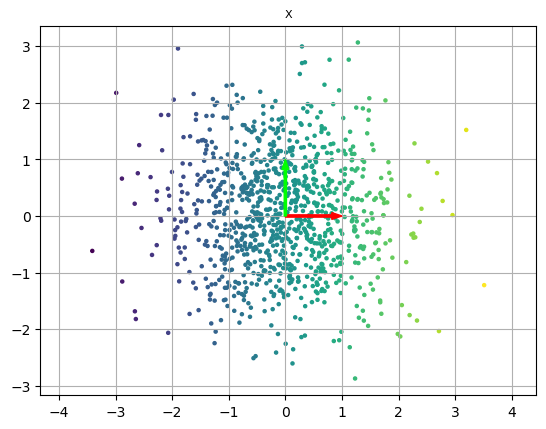

In [3]:
# generate some points in 2-D space
n_points = 1000
X = tf.random.normal(shape=(n_points, 2))
colors = X[:, 0]

show_scatterplot(X, colors, title='X')
OI = tf.concat((tf.zeros((2, 2)), tf.eye(2)), 0)
plot_bases(OI)

# Visualizing Linear Transformations

* Generate a random matrix $W$

$
\begin{equation}
    W = U
  \left[ {\begin{array}{cc}
   s_1 & 0 \\
   0 & s_2 \\
  \end{array} } \right]
  V^\top
\end{equation}
$

* Compute $y = Wx$
* Larger singular values stretch the points
* Smaller singular values push them together
* $U, V$ rotate/reflect

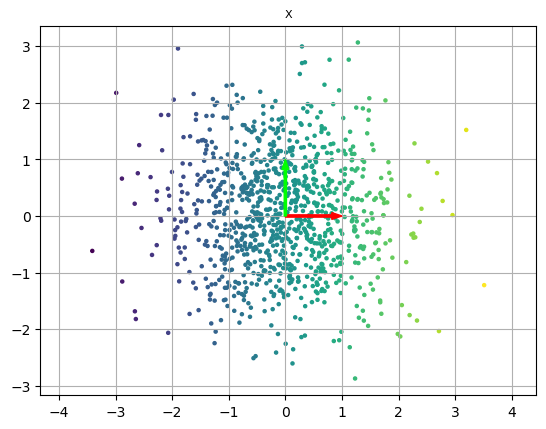

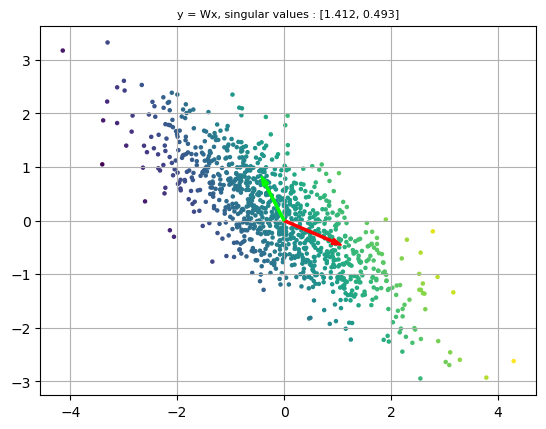

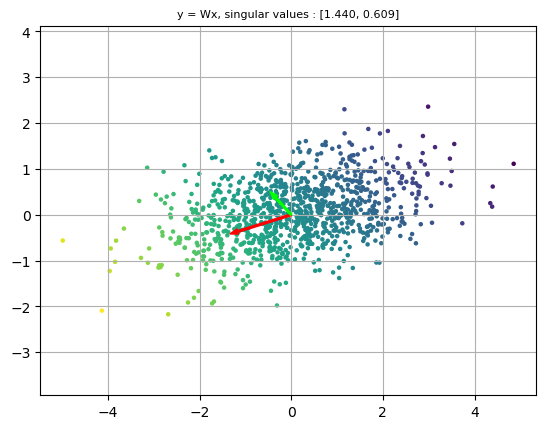

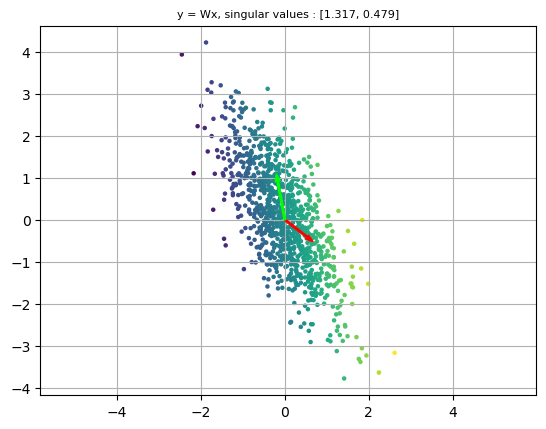

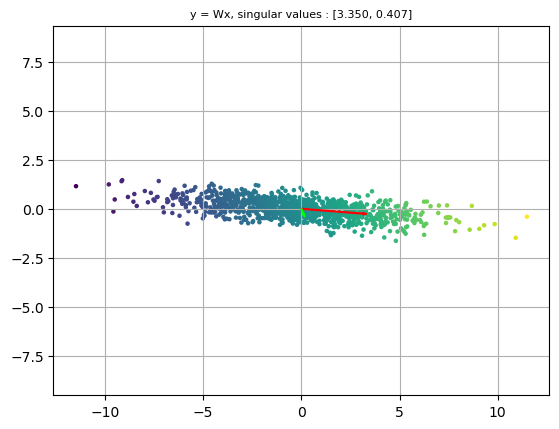

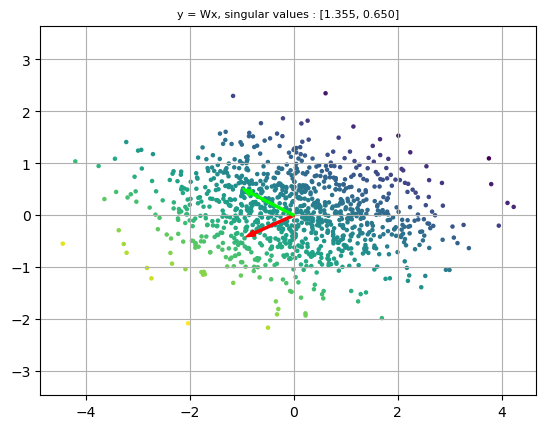

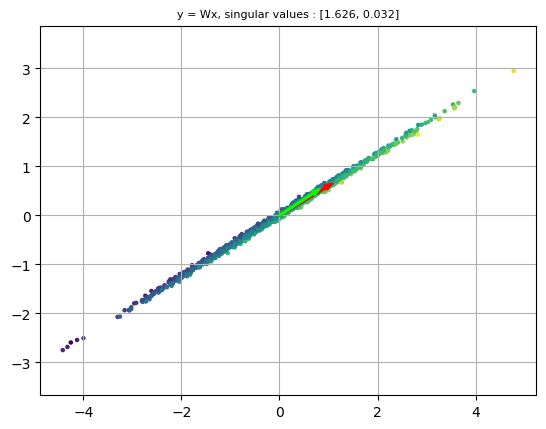

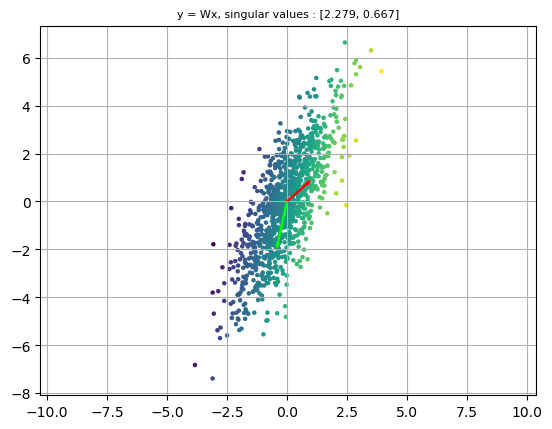

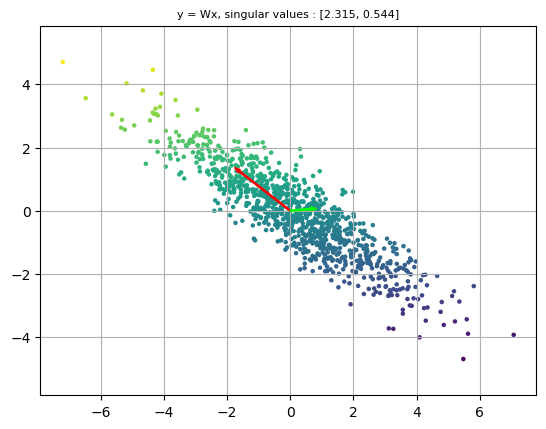

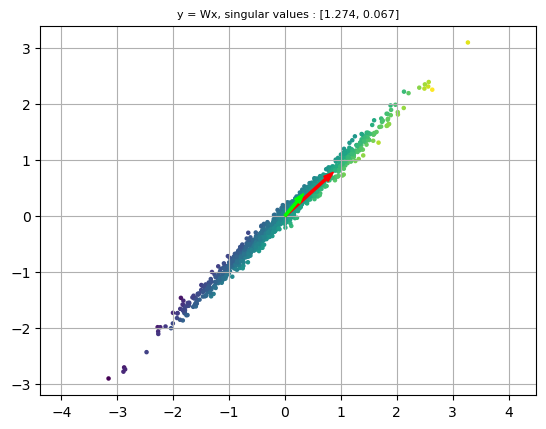

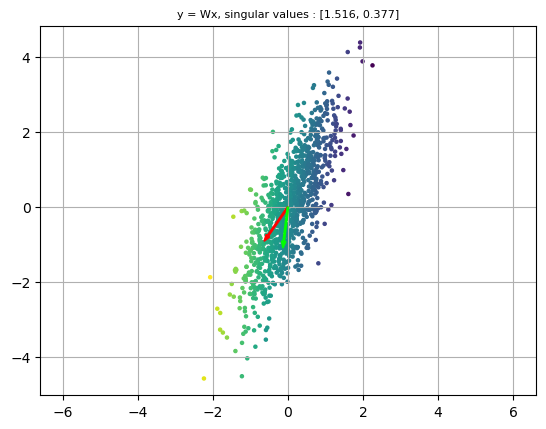

In [4]:
show_scatterplot(X, colors, title='X')
plot_bases(OI)

for i in range(10):
    # create a random matrix
    W = tf.random.normal((2,2))
    # transform points
    Y = X @ tf.transpose(W)
    # compute singular values
    S, U, V = tf.linalg.svd(W)
    # plot transformed points
    show_scatterplot(Y, colors, 
                     title=f'y = Wx, singular values : [{S[0]:.3f}, {S[1]:.3f}]'
                    )
    # transform the basis
    new_OI = OI @ tf.transpose(W)
    # plot old and new basis
    plot_bases(new_OI)

# Linear transformation with TensorFlow

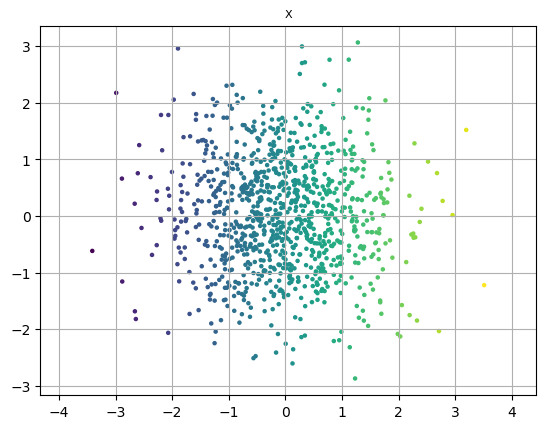

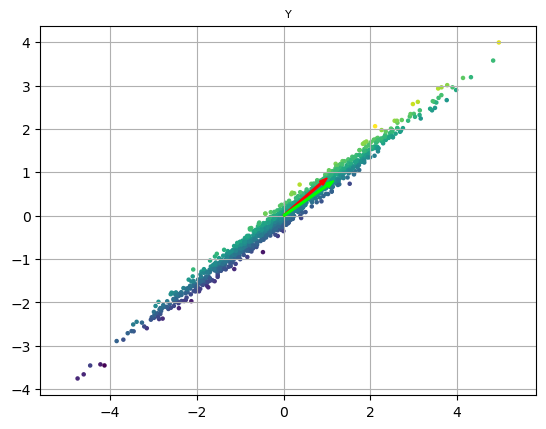

In [5]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(2, use_bias=False))
model.compile()

Y = model(X)
show_scatterplot(X, colors, title='X')
show_scatterplot(Y, colors, title='Y')
plot_bases(model(OI))

# Non-linear Transform: Map Points to a Square

* Linear transforms can rotate, reflect, stretch and compress, but cannot curve.
* We need non-linearities for this.
* We can (approximately) map points to a square by first stretching out by a factor $s$, then squashing with a tanh function

$
   f(x)= \tanh \left(
  \left[ {\begin{array}{cc}
   s & 0 \\
   0 & s \\
  \end{array} } \right]  
  x
  \right)
$

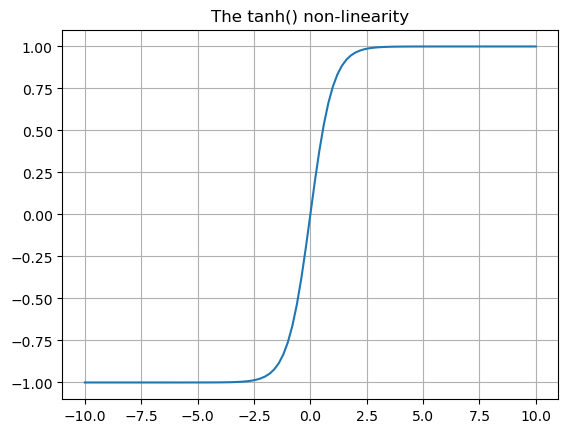

In [6]:
z = tf.linspace(-10, 10, 101)
s = tf.math.tanh(z)
plt.grid()
plt.plot(z.numpy(), s.numpy())
plt.title('The tanh() non-linearity')
plt.show()

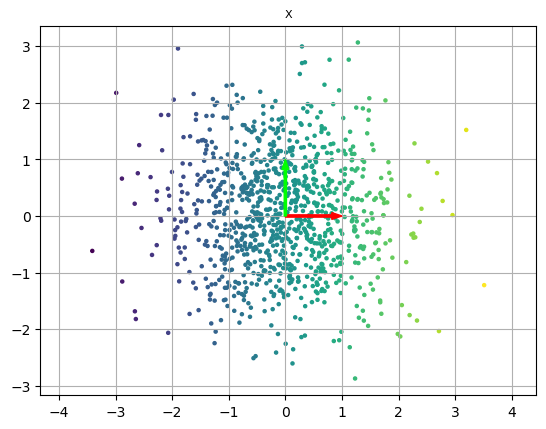

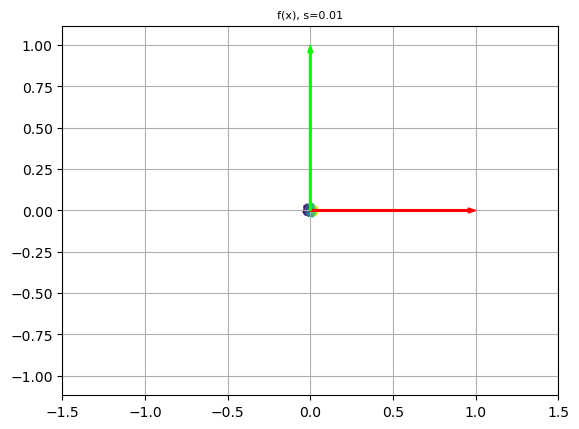

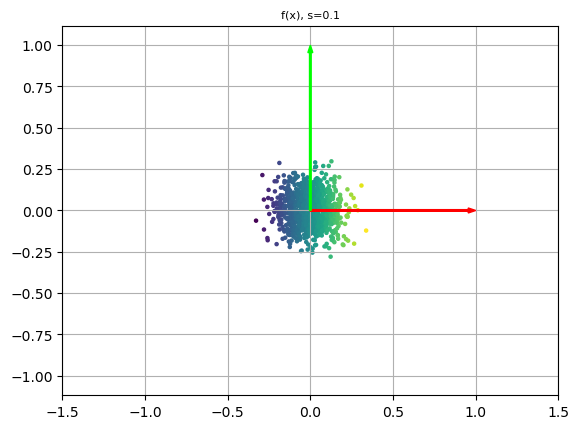

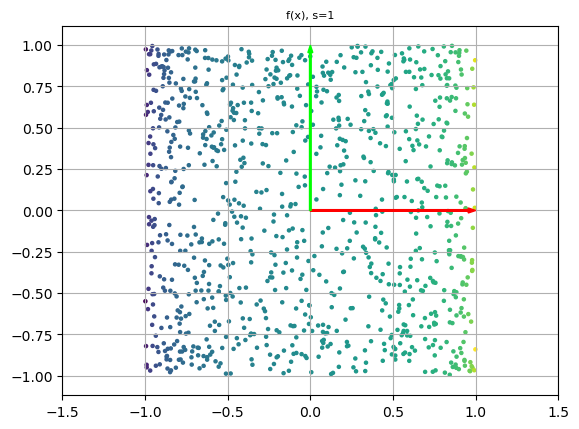

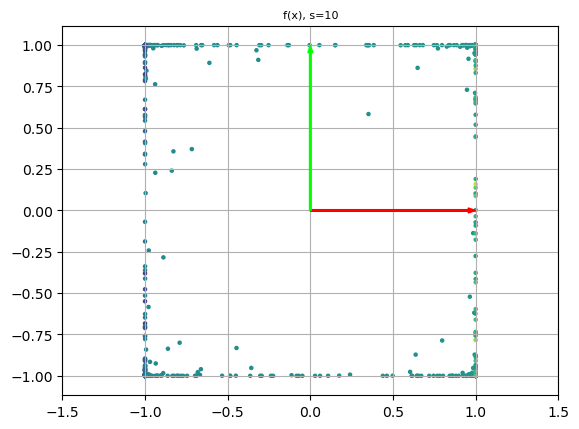

In [20]:
show_scatterplot(X, colors, title='X')
plot_bases(OI)

model = tf.keras.Sequential() # try with 'sigmoid' or with 'relu'
model.add(tf.keras.layers.Dense(2, activation='tanh', use_bias=False, input_shape=(2,)))
model.compile()

for s in range(-2, 2):
    W = 10 ** s * tf.eye(2)
    model.set_weights([W])
    Y = model(X)
    show_scatterplot(Y, colors, 
                     title=f'f(x), s={10**s}',
                     xlim=[-1.5,1.5], ylim=[-1.5,1.5]
                    )
    plot_bases(OI, width=0.01)

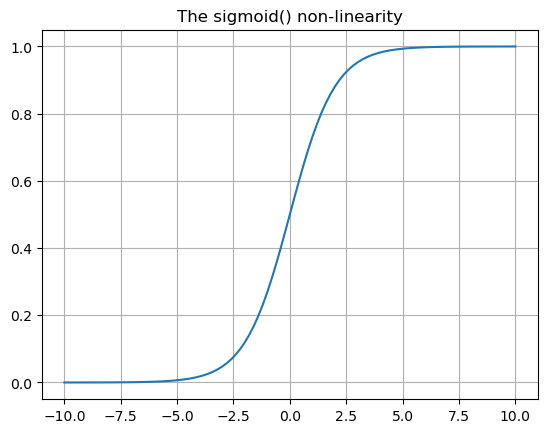

In [8]:
z = tf.linspace(-10, 10, 101)
s = tf.math.sigmoid(z)
plt.grid()
plt.plot(z.numpy(), s.numpy())
plt.title('The sigmoid() non-linearity')
plt.show()

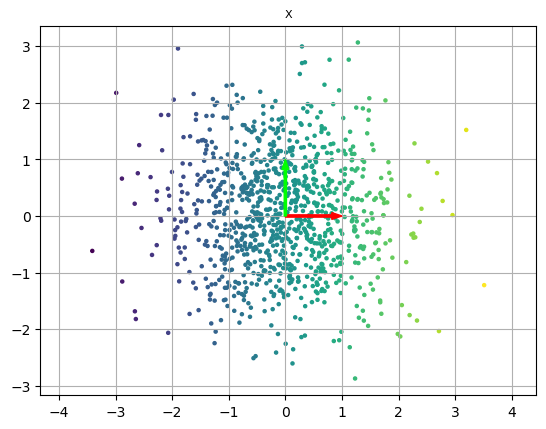

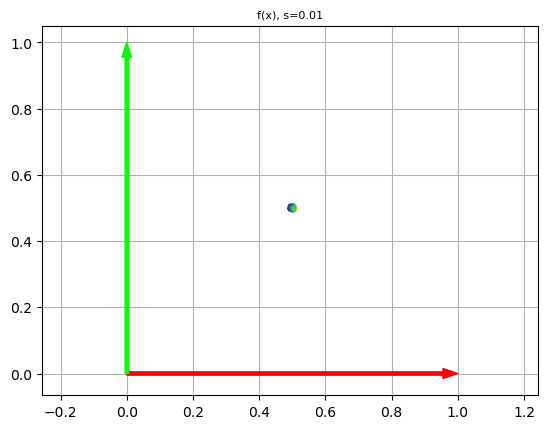

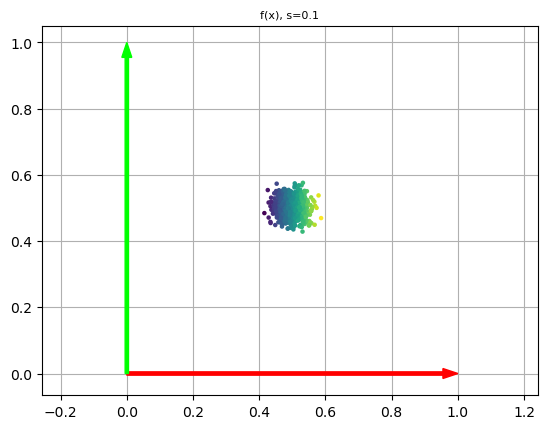

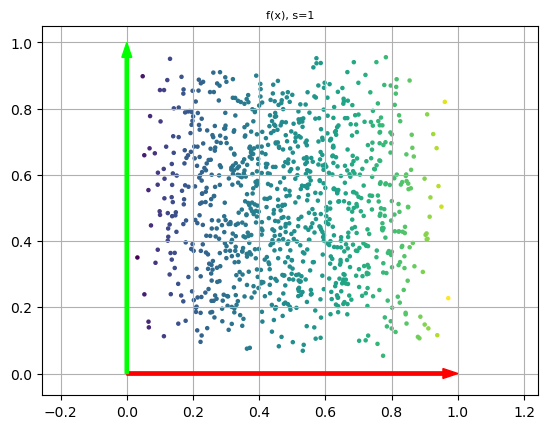

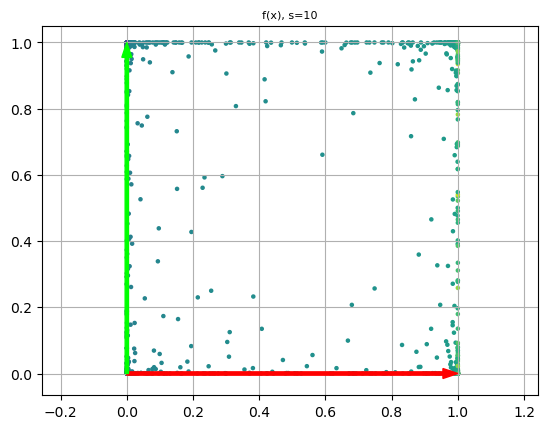

In [16]:
show_scatterplot(X, colors, title='X')
plot_bases(OI)

model = tf.keras.Sequential() 
model.add(tf.keras.layers.Dense(2, activation='sigmoid', use_bias=False, input_shape=(2,)))
model.compile()

for s in range(-2, 2):
    W = 10 ** s * tf.eye(2)
    model.set_weights([W])
    Y = model(X)
    show_scatterplot(Y, colors, 
                     title=f'f(x), s={10**s}',
                     # xlim=[-1,1], ylim=[-1,1.2]
                    )
    plot_bases(OI, width=0.01)

# Non-linear Transform: Map Points to a Quadrant

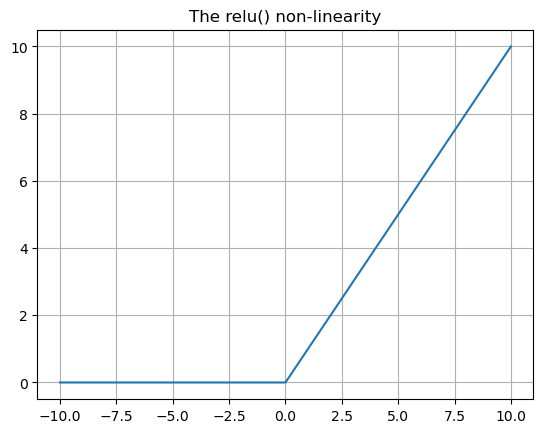

In [13]:
z = tf.linspace(-10, 10, 101)
s = tf.nn.relu(z)
plt.grid()
plt.plot(z.numpy(), s.numpy())
plt.title('The relu() non-linearity')
plt.show()

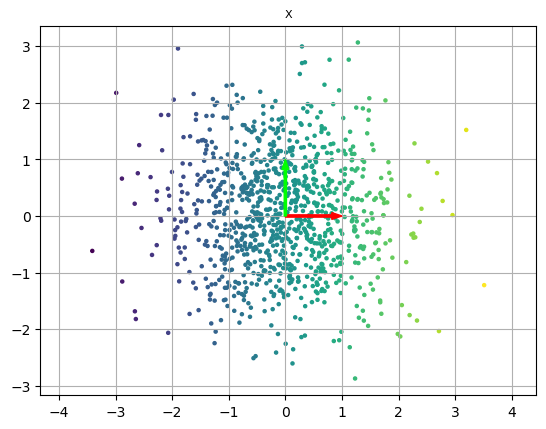

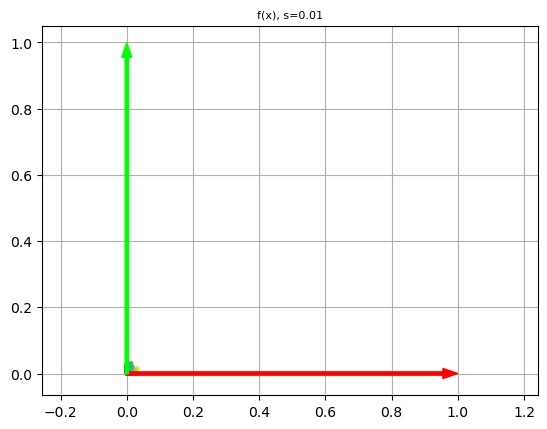

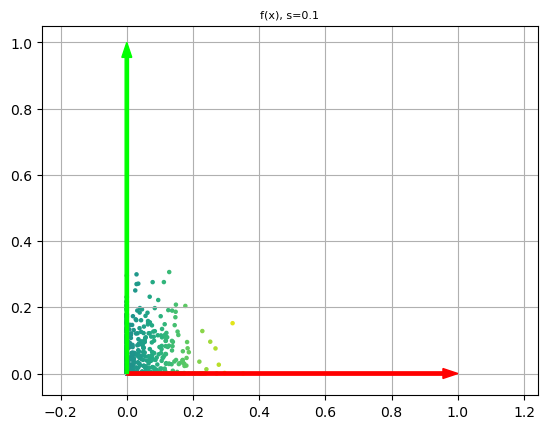

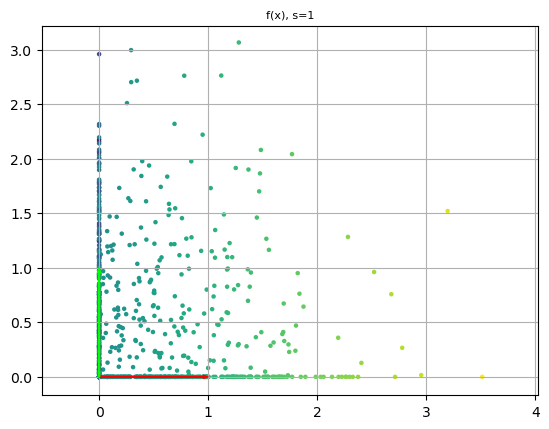

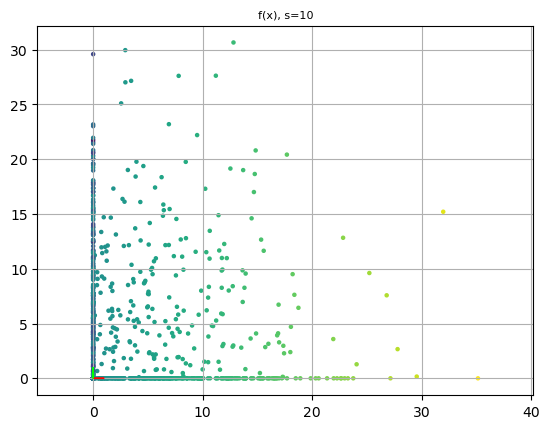

In [14]:
show_scatterplot(X, colors, title='X')
plot_bases(OI)

model = tf.keras.Sequential() 
model.add(tf.keras.layers.Dense(2, activation='relu', use_bias=False, input_shape=(2,)))
model.compile()

for s in range(-2, 2):
    W = 10 ** s * tf.eye(2)
    model.set_weights([W])
    Y = model(X)
    show_scatterplot(Y, colors, 
                     title=f'f(x), s={10**s}',
                    )
    plot_bases(OI, width=0.01)

# Two layers

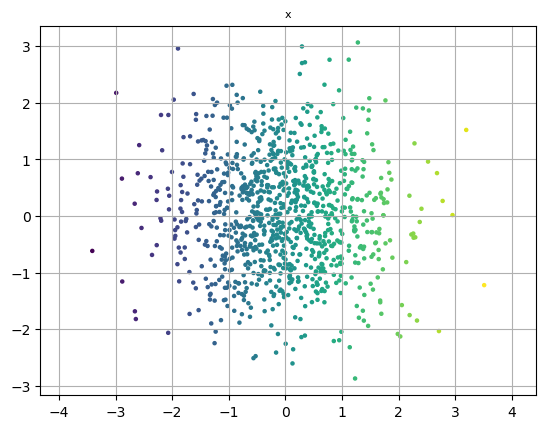

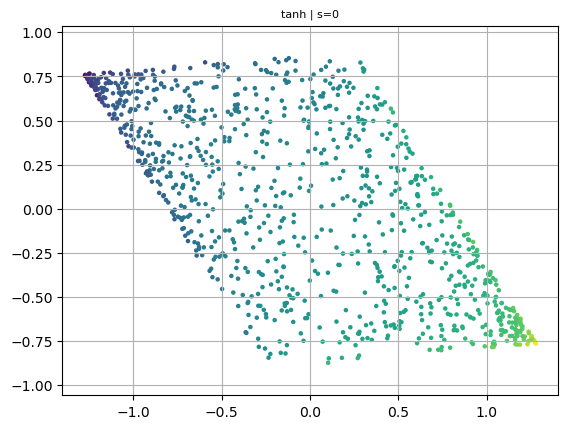

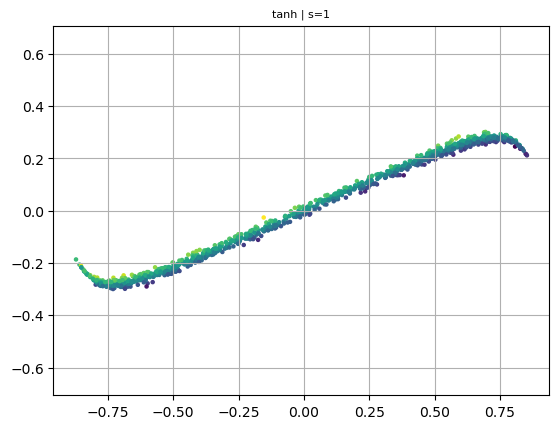

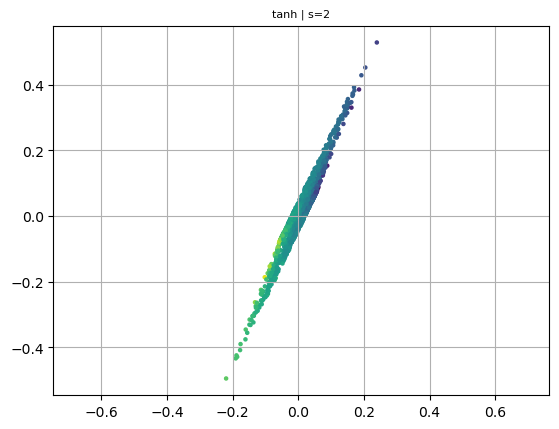

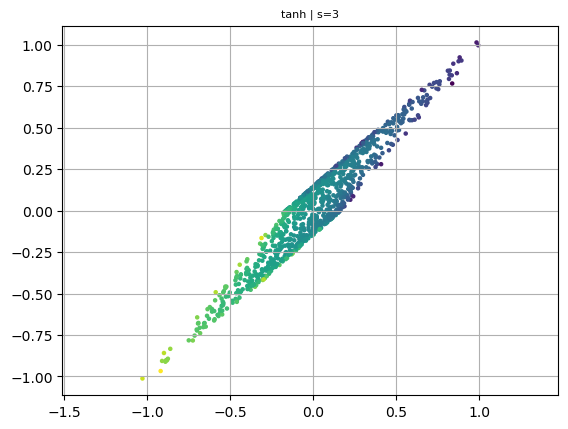

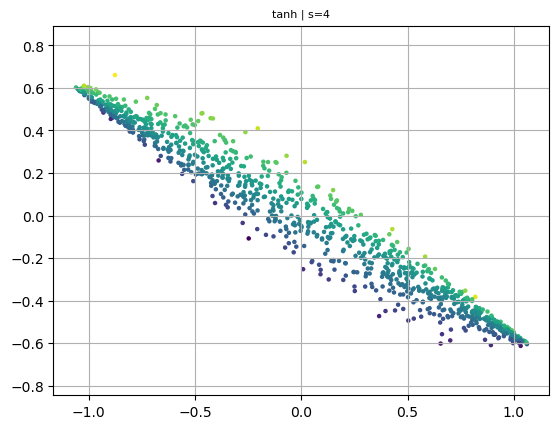

In [22]:
show_scatterplot(X, colors, title='x')
n_hidden = 5

for i in range(5):
    # create 1-layer neural networks with random weights
    model = tf.keras.Sequential([
            tf.keras.layers.Dense(2, activation="tanh", input_shape=(2,)), 
            tf.keras.layers.Dense(n_hidden), 
        ])
    model.compile()
    Y = model(X)
    
    show_scatterplot(Y, colors, title=f'tanh | s={i}')


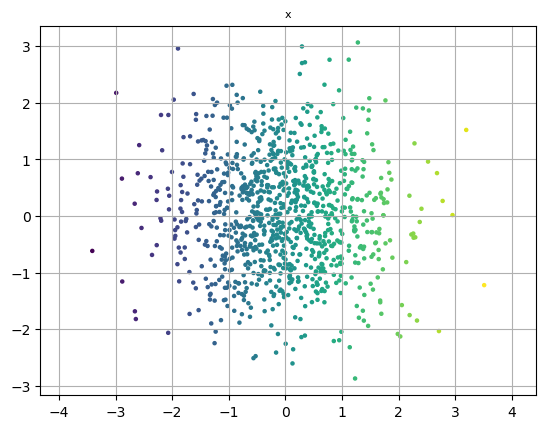

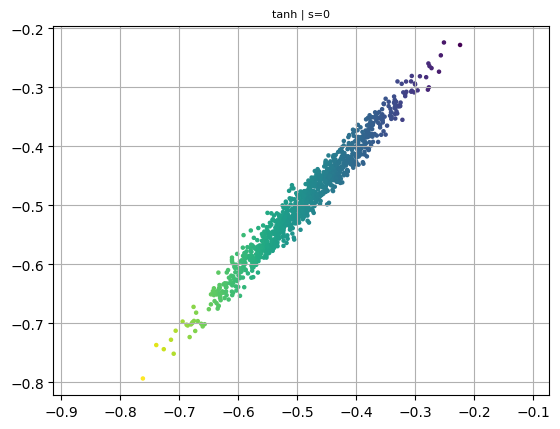

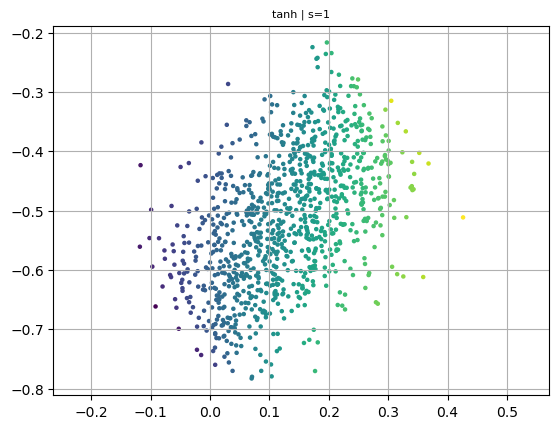

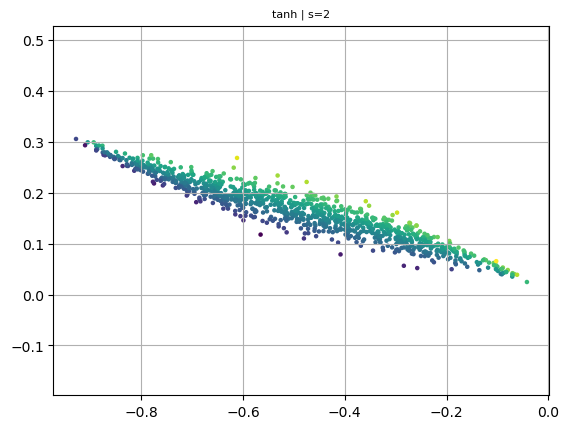

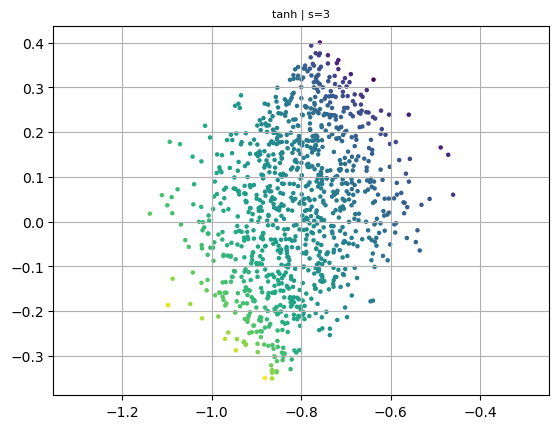

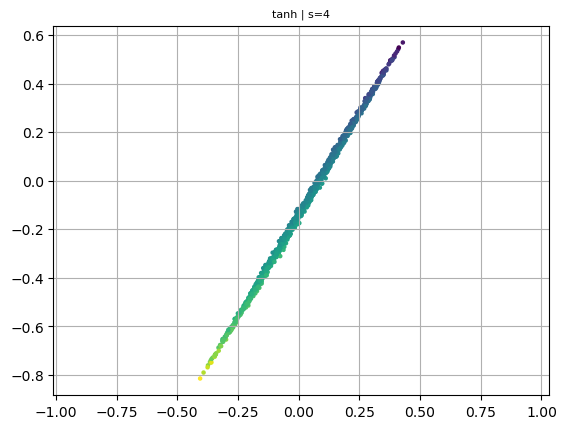

In [21]:
show_scatterplot(X, colors, title='x')
n_hidden = 5

for i in range(5):
    # create 1-layer neural networks with random weights
    model = tf.keras.Sequential([
            tf.keras.layers.Dense(2, activation="sigmoid", input_shape=(2,)), 
            tf.keras.layers.Dense(n_hidden), 
        ])
    model.compile()
    Y = model(X)
    
    show_scatterplot(Y, colors, title=f'tanh | s={i}')


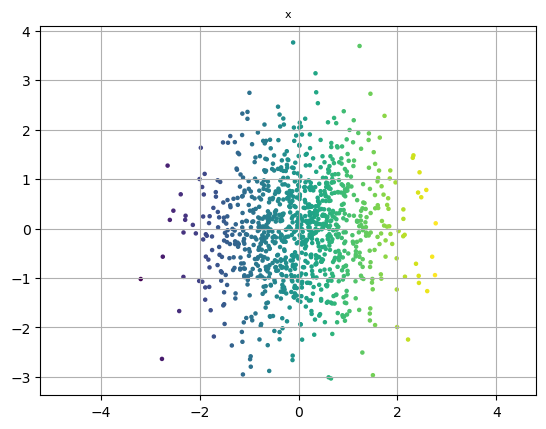

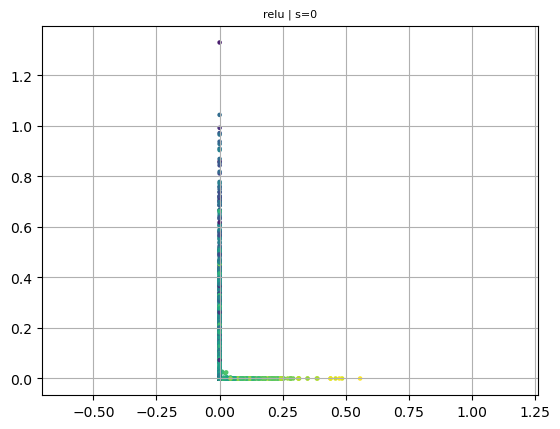

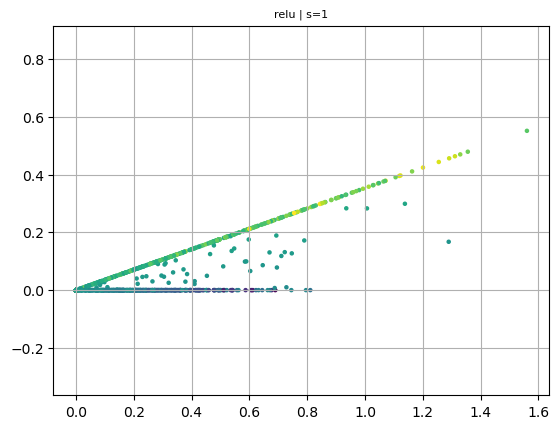

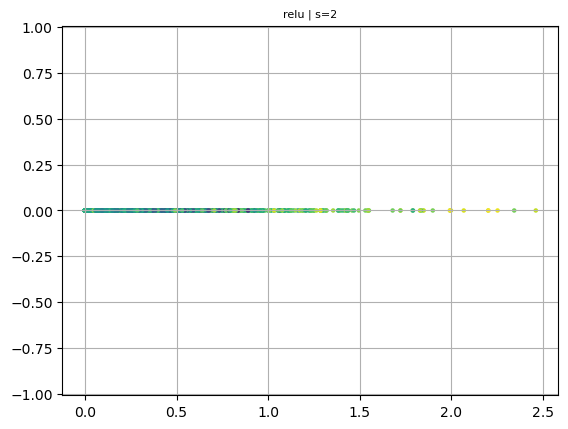

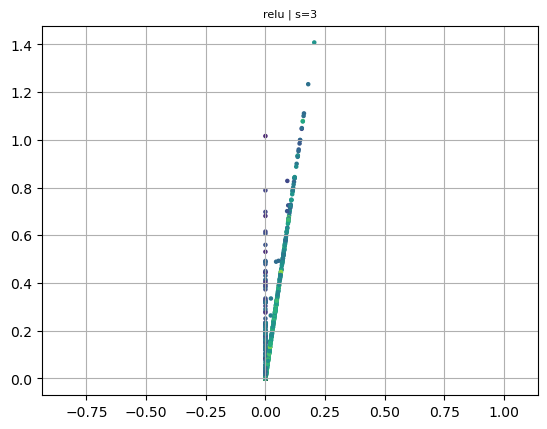

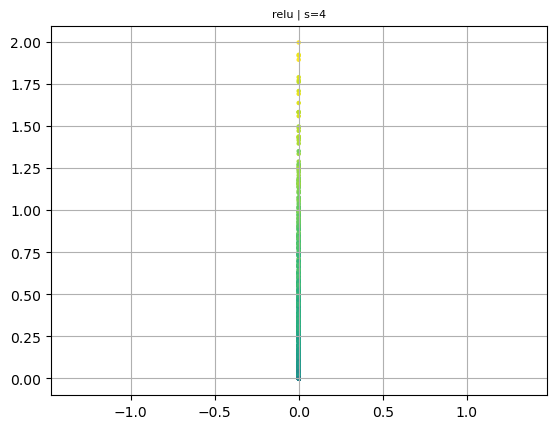

In [ ]:
show_scatterplot(X, colors, title='x')
n_hidden = 5

for i in range(5):
    
    model = tf.keras.Sequential([
                tf.keras.layers.Dense(2, activation="relu", input_shape=(2,)), 
                tf.keras.layers.Dense(n_hidden, activation="relu"), 
            ])
    model.compile()
    Y = model(X)
    
    show_scatterplot(Y, colors, title=f"relu | s={i}")


In [ ]:
def double_scatterplot(X1, X2, colors, title1='', title2=''):
    
    fig, (ax1, ax2) = plt.subplots(1, 2,
                                   figsize=(10, 10),
                                   subplot_kw={"aspect":"equal",},
                                   sharex=True, sharey=True,
                                  )
    ax1.set_xlim([-1,1])
    ax1.set_ylim([-1,1])
    ax1.scatter(X1[:, 0], X1[:, 1], c=colors, s=5)
    ax1.set_title(title1, fontdict={'fontsize':8})
    
    ax2.set_xlim([-1,1])
    ax2.set_ylim([-1,1])
    ax2.scatter(X2[:, 0], X2[:, 1], c=colors, s=5)
    ax2.set_title(title2, fontdict={'fontsize':8})

# Four layers

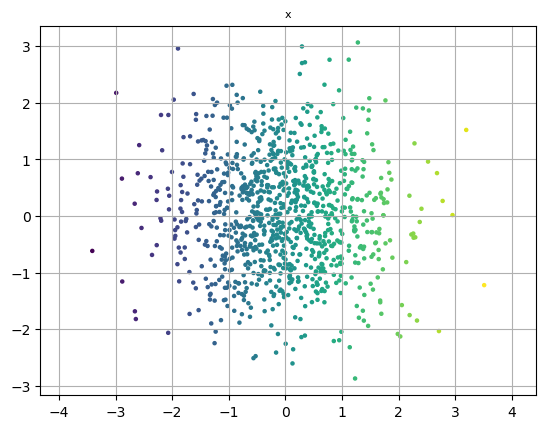

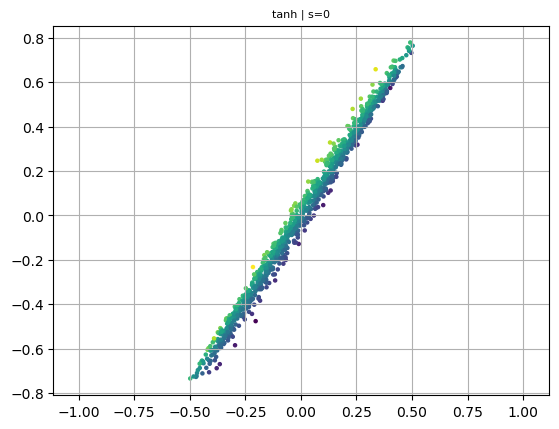

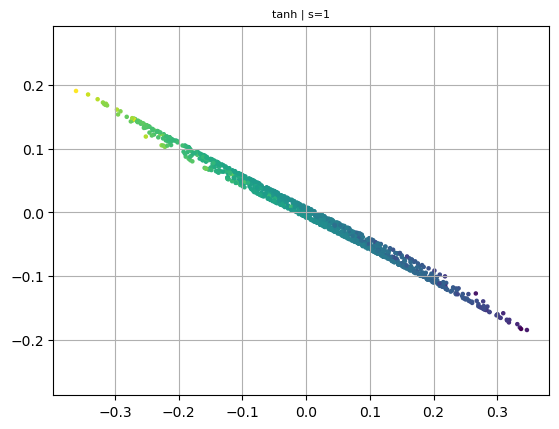

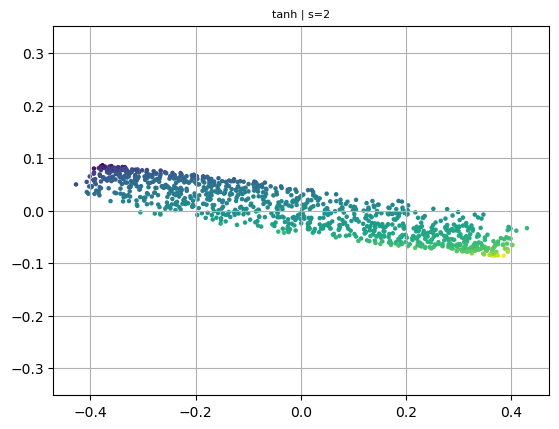

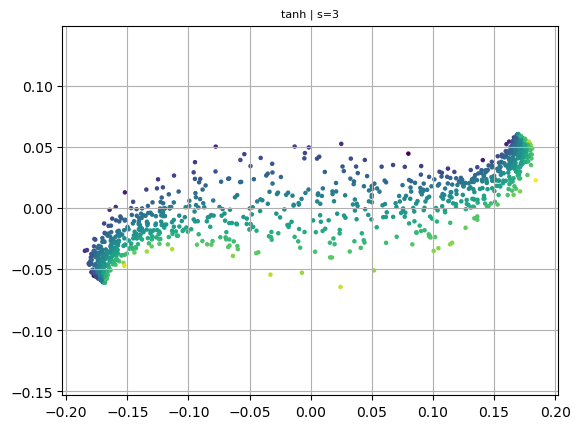

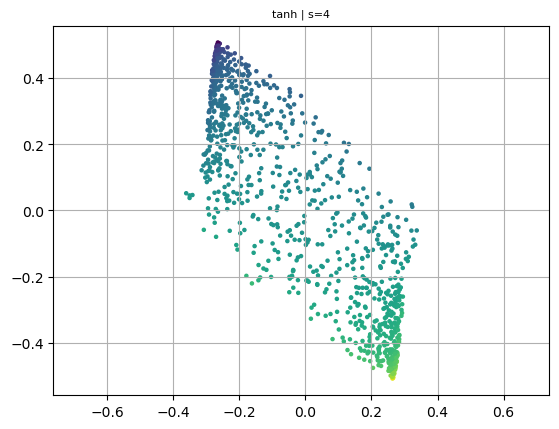

In [23]:
# deeper network with random weights
show_scatterplot(X, colors, title='x')
n_hidden = 5


for i in range(5):
    model = tf.keras.Sequential([
            tf.keras.layers.Dense(2, activation="tanh", input_shape=(2,)), 
            tf.keras.layers.Dense(n_hidden, activation="tanh"), 
            tf.keras.layers.Dense(n_hidden, activation="tanh"), 
            tf.keras.layers.Dense(n_hidden), 
        ])
    model.compile()
    Y = model(X)

    show_scatterplot(Y, colors, title=f'tanh | s={i}')


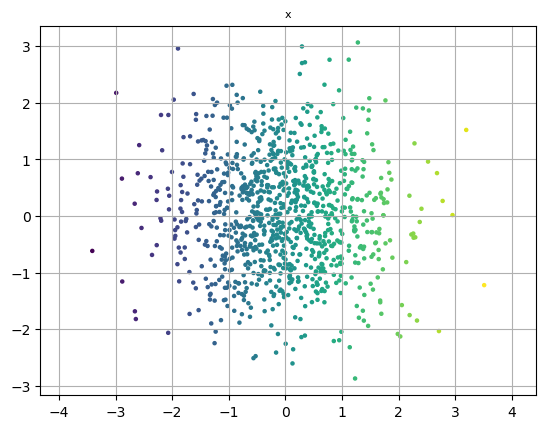

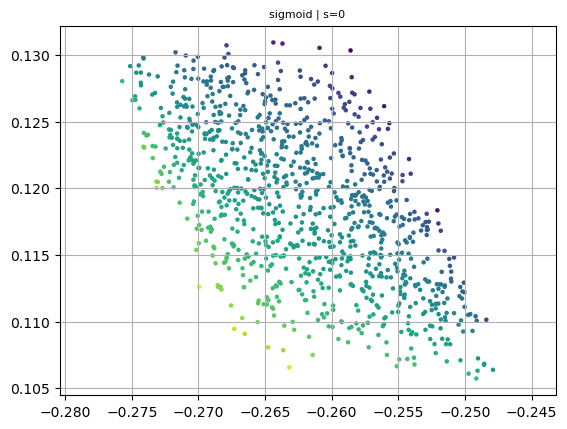

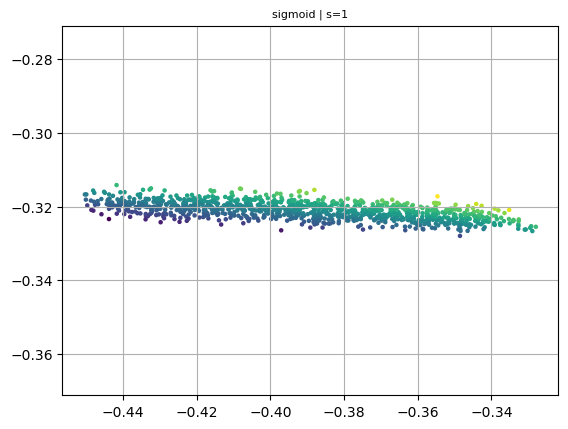

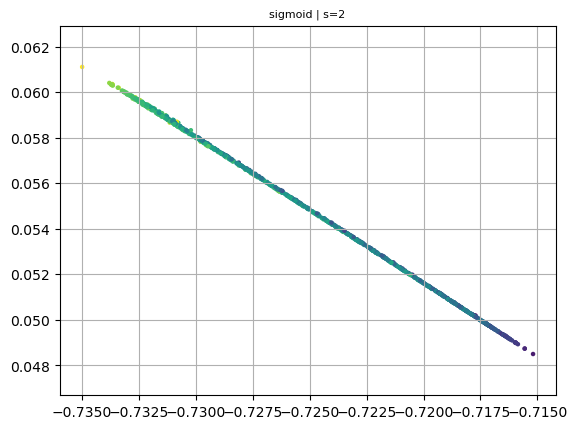

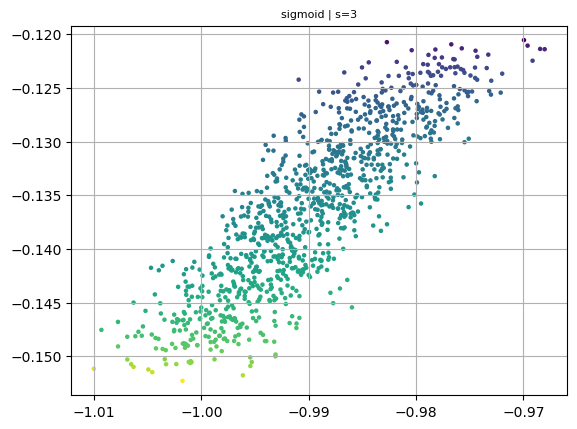

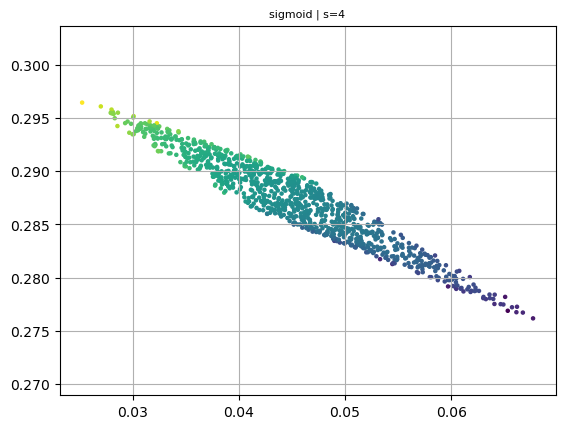

In [25]:
# deeper network with random weights
show_scatterplot(X, colors, title='x')
n_hidden = 5


for i in range(5):
    model = tf.keras.Sequential([
            tf.keras.layers.Dense(2, activation="sigmoid", input_shape=(2,)), 
            tf.keras.layers.Dense(n_hidden, activation="sigmoid"), 
            tf.keras.layers.Dense(n_hidden, activation="sigmoid"), 
            tf.keras.layers.Dense(n_hidden), 
        ])
    model.compile()
    Y = model(X)

    show_scatterplot(Y, colors, title=f'sigmoid | s={i}')


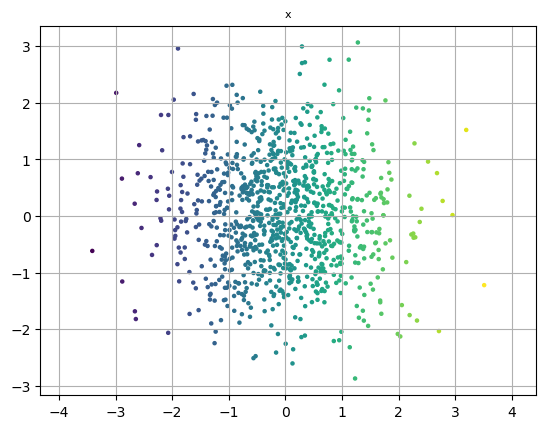

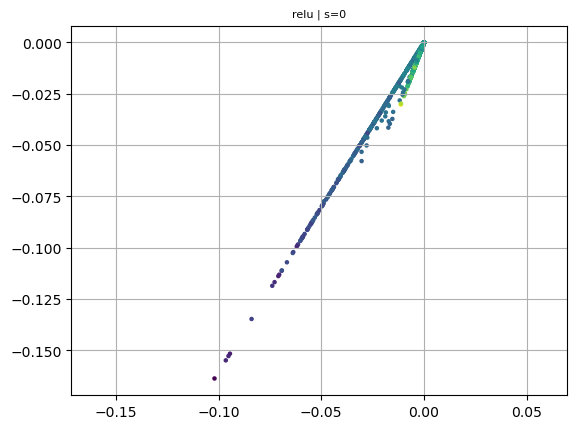

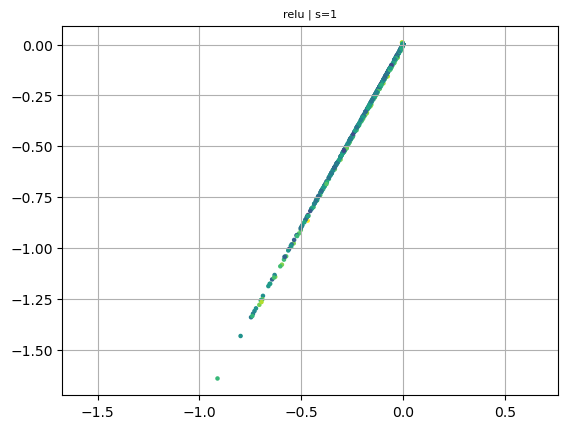

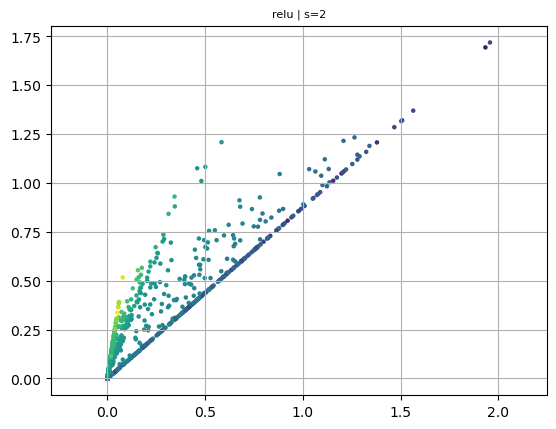

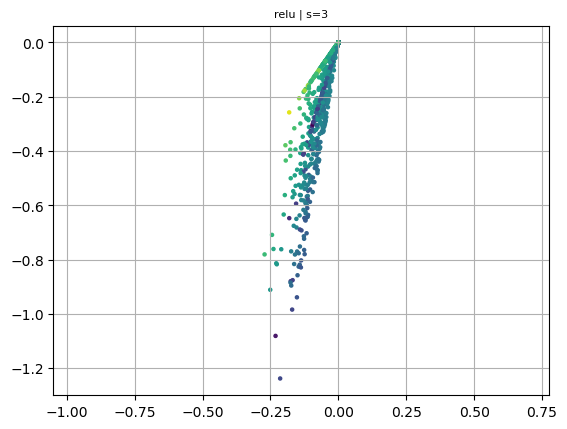

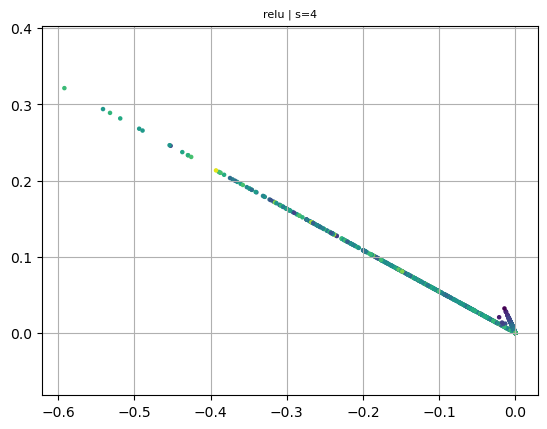

In [26]:
# deeper network with random weights
show_scatterplot(X, colors, title='x')
n_hidden = 5


for i in range(5):

    model = tf.keras.Sequential([
            tf.keras.layers.Dense(2, activation="relu", input_shape=(2,)), 
            tf.keras.layers.Dense(n_hidden, activation="relu"), 
            tf.keras.layers.Dense(n_hidden, activation="relu"), 
            tf.keras.layers.Dense(n_hidden), 
            ])
    model.compile()
    Y = model(X)

    show_scatterplot(Y, colors, title=f'relu | s={i}')


# Eight layers, 200 hidden neurons

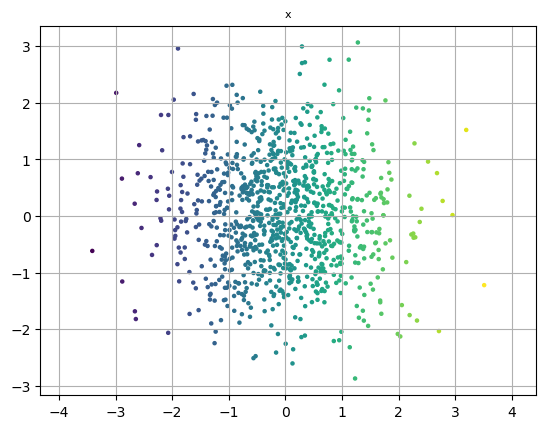

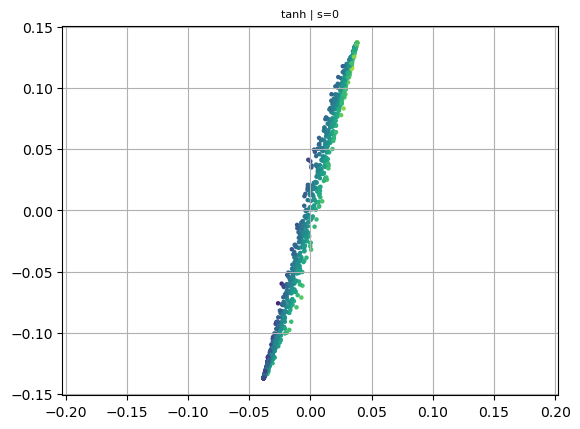

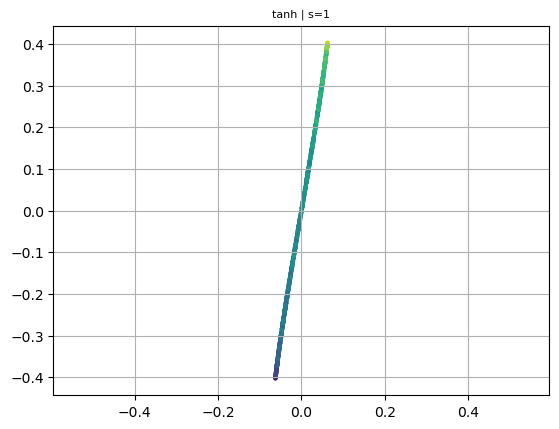

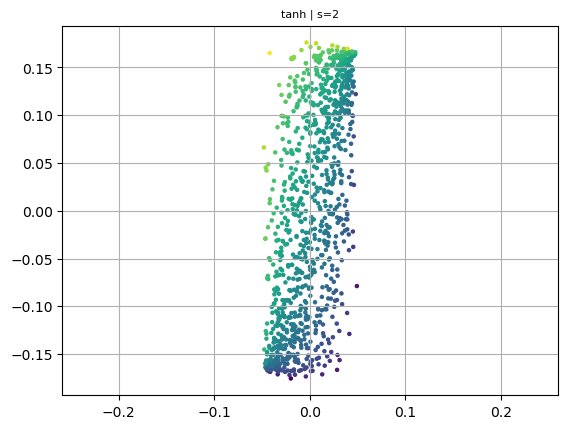

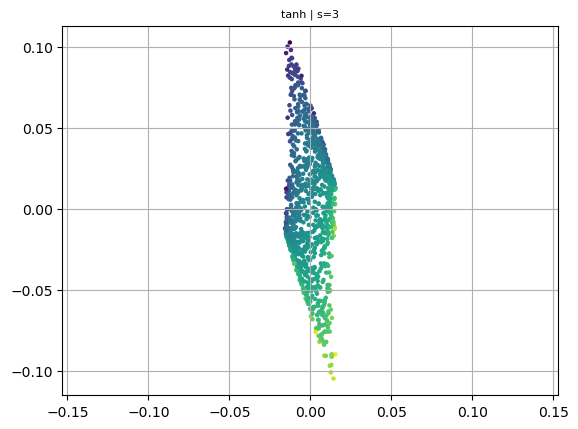

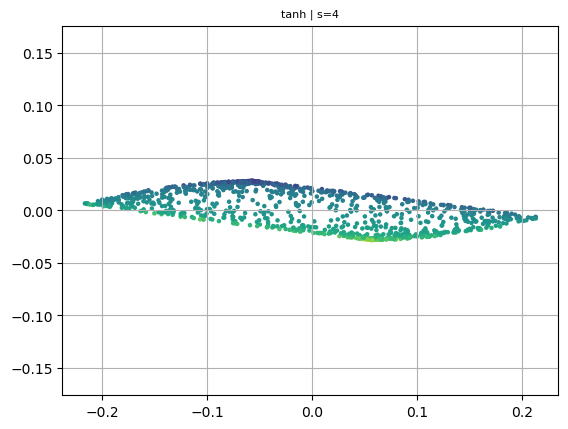

In [29]:
# deeper network with random weights
show_scatterplot(X, colors, title='x')
n_hidden = 200


for i in range(5):

    model = tf.keras.Sequential([
            tf.keras.layers.Dense(2, activation="tanh", input_shape=(2,)), 
            tf.keras.layers.Dense(n_hidden, activation="tanh"), 
            tf.keras.layers.Dense(n_hidden, activation="tanh"), 
            tf.keras.layers.Dense(n_hidden, activation="tanh"), 
            tf.keras.layers.Dense(n_hidden, activation="tanh"), 
            tf.keras.layers.Dense(n_hidden, activation="tanh"), 
            tf.keras.layers.Dense(n_hidden, activation="tanh"), 
            tf.keras.layers.Dense(n_hidden), 
            ])
    model.compile()
    Y = model(X)

    show_scatterplot(Y, colors, title=f'tanh | s={i}')


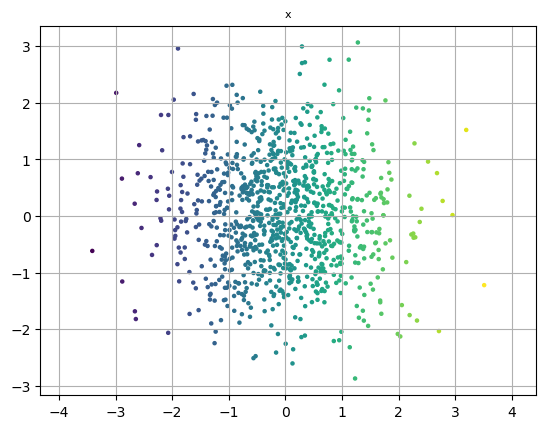

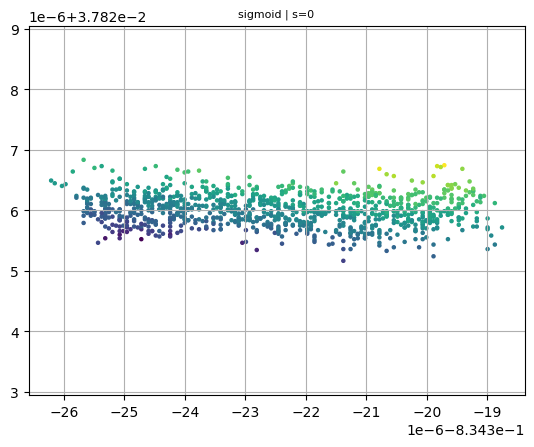

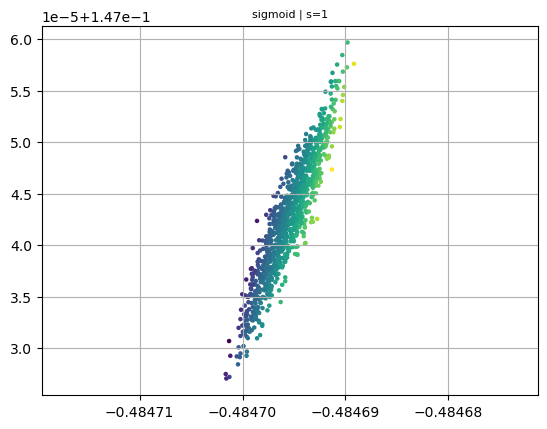

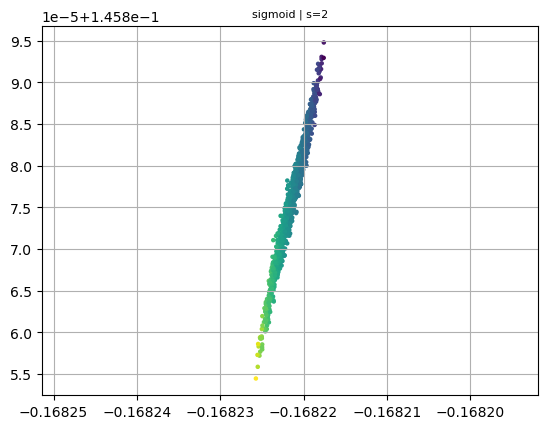

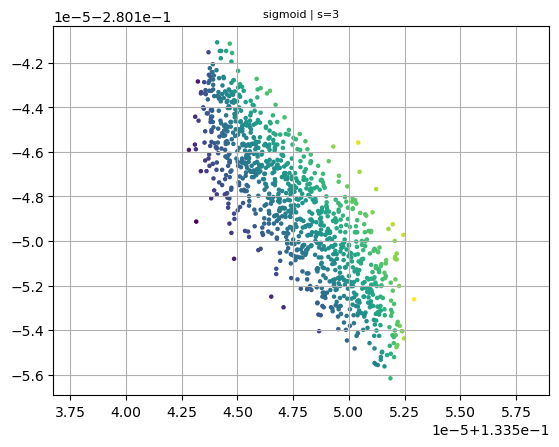

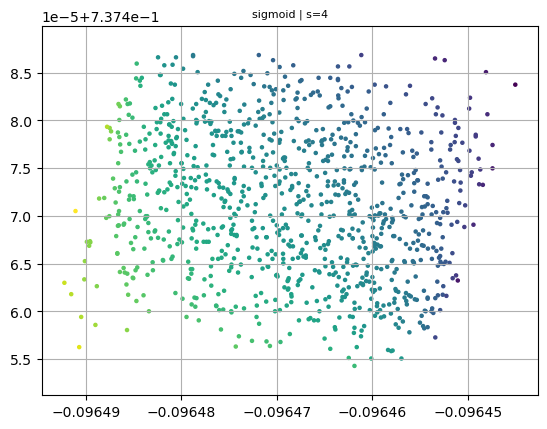

In [30]:
# deeper network with random weights
show_scatterplot(X, colors, title='x')
n_hidden = 200


for i in range(5):

    model = tf.keras.Sequential([
            tf.keras.layers.Dense(2, activation="sigmoid", input_shape=(2,)), 
            tf.keras.layers.Dense(n_hidden, activation="sigmoid"), 
            tf.keras.layers.Dense(n_hidden, activation="sigmoid"), 
            tf.keras.layers.Dense(n_hidden, activation="sigmoid"), 
            tf.keras.layers.Dense(n_hidden, activation="sigmoid"), 
            tf.keras.layers.Dense(n_hidden, activation="sigmoid"), 
            tf.keras.layers.Dense(n_hidden, activation="sigmoid"), 
            tf.keras.layers.Dense(n_hidden), 
            ])
    model.compile()
    Y = model(X)

    show_scatterplot(Y, colors, title=f'sigmoid | s={i}')


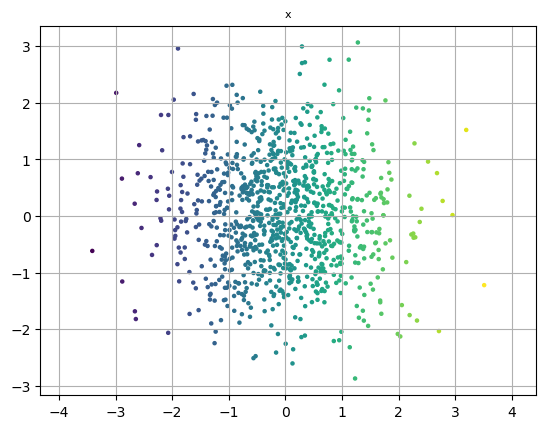

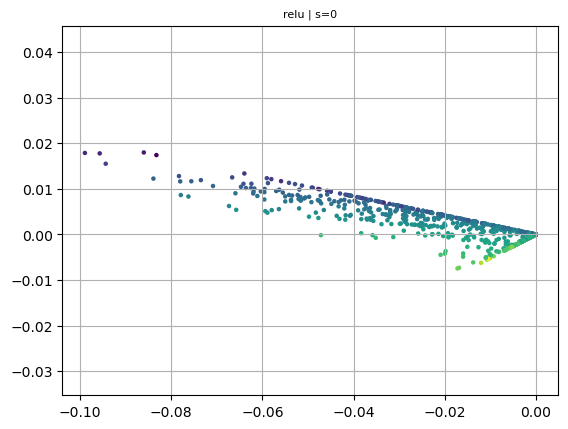

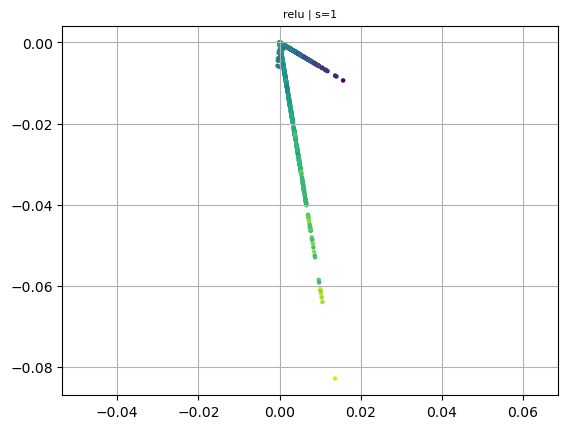

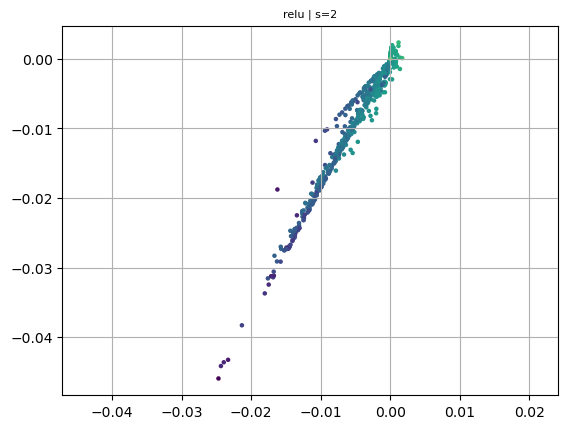

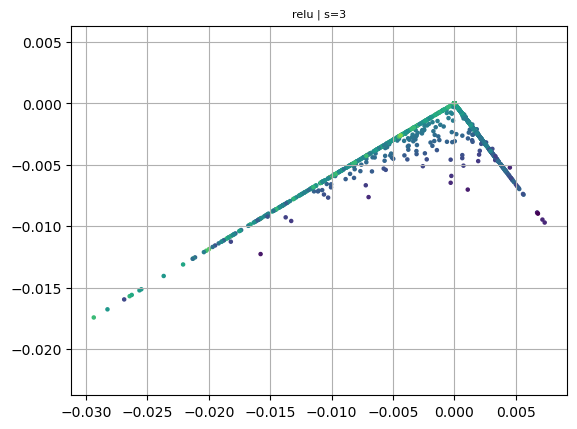

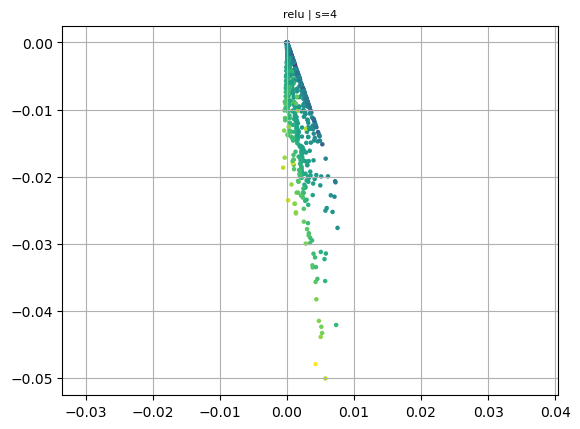

In [28]:
# deeper network with random weights
show_scatterplot(X, colors, title='x')
n_hidden = 200


for i in range(5):

    model = tf.keras.Sequential([
            tf.keras.layers.Dense(2, activation="relu", input_shape=(2,)), 
            tf.keras.layers.Dense(n_hidden, activation="relu"), 
            tf.keras.layers.Dense(n_hidden, activation="relu"), 
            tf.keras.layers.Dense(n_hidden, activation="relu"), 
            tf.keras.layers.Dense(n_hidden, activation="relu"), 
            tf.keras.layers.Dense(n_hidden, activation="relu"), 
            tf.keras.layers.Dense(n_hidden, activation="relu"), 
            tf.keras.layers.Dense(n_hidden), 
            ])
    model.compile()
    Y = model(X)

    show_scatterplot(Y, colors, title=f'relu | s={i}')


# Visualize every layer

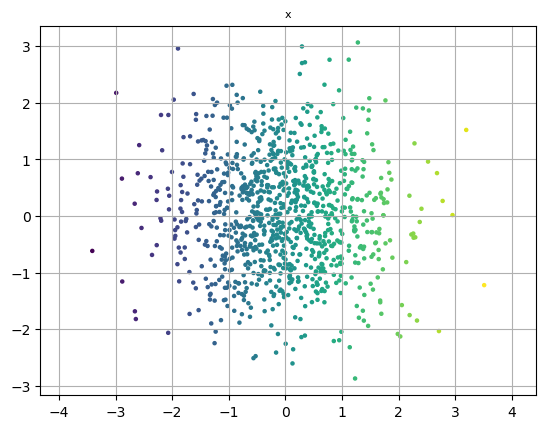

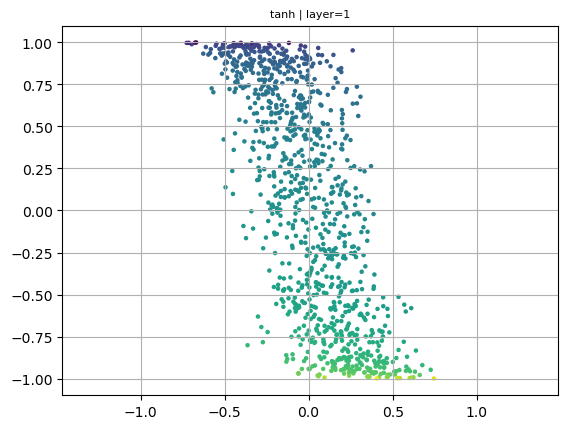

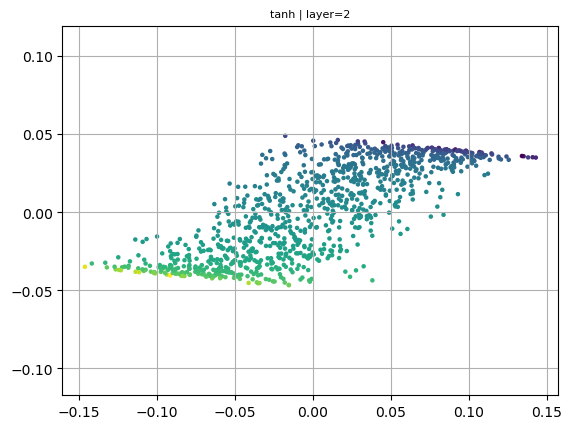

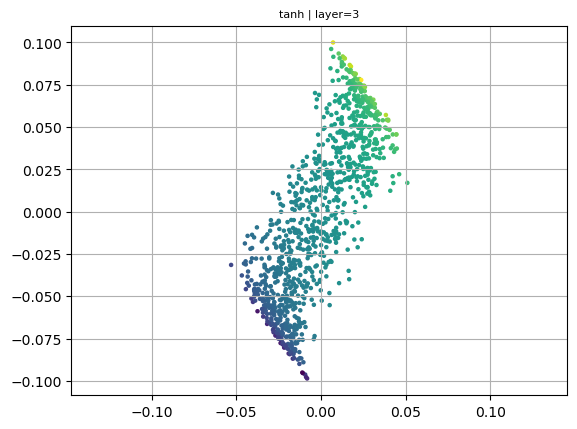

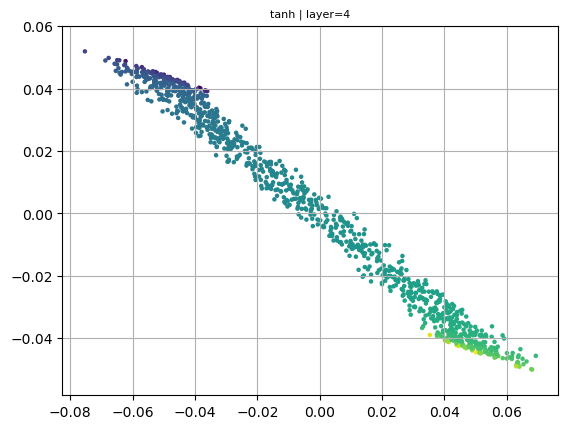

In [54]:
# deeper network with random weights
show_scatterplot(X, colors, title='x')
n_hidden = 200
n_layer = 3


inp = tf.keras.Input(shape=(2,))
x = tf.keras.layers.Dense(2, activation="tanh")(inp)
activations = [x]
for i in range(n_layer):
    if i < n_layer - 1:
        x = tf.keras.layers.Dense(n_hidden, activation="tanh")(x)
    else:
        x = tf.keras.layers.Dense(n_hidden)(x)
    activations.append(x)
model = tf.keras.Model(inp, activations)
model.compile()
Ys = model(X)
for i, Y in enumerate(Ys):
    show_scatterplot(Y, colors, title=f'tanh | layer={i+1}')


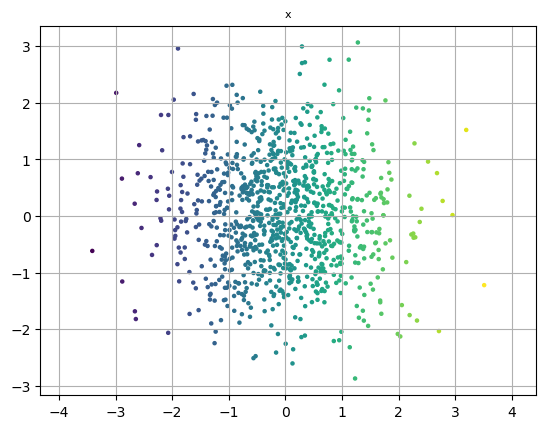

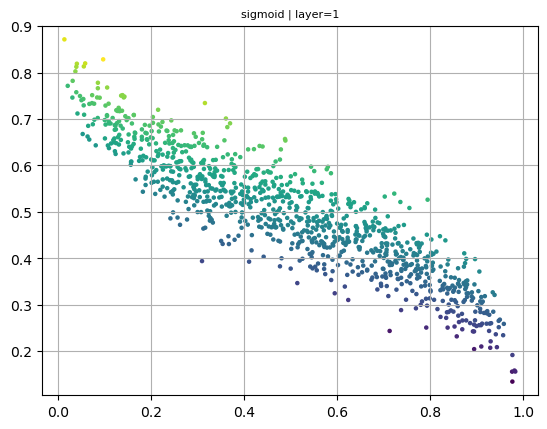

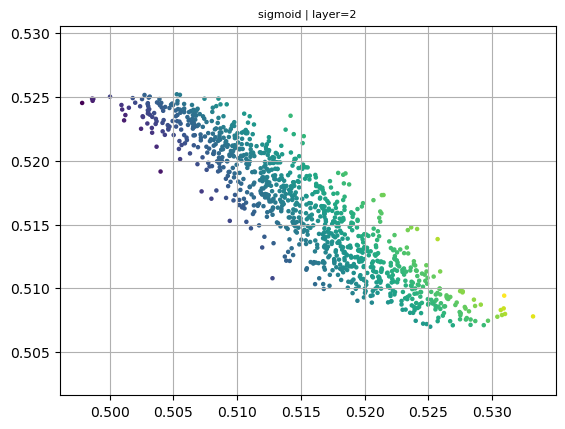

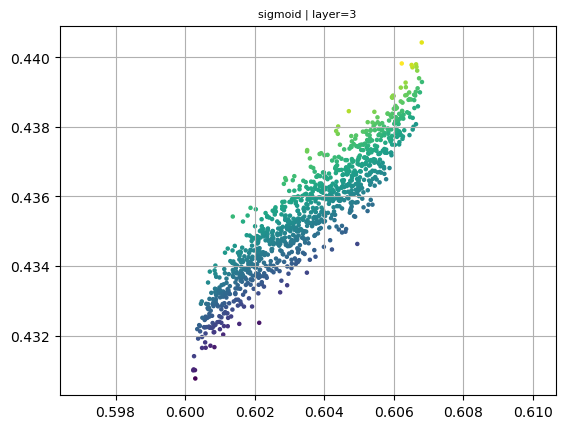

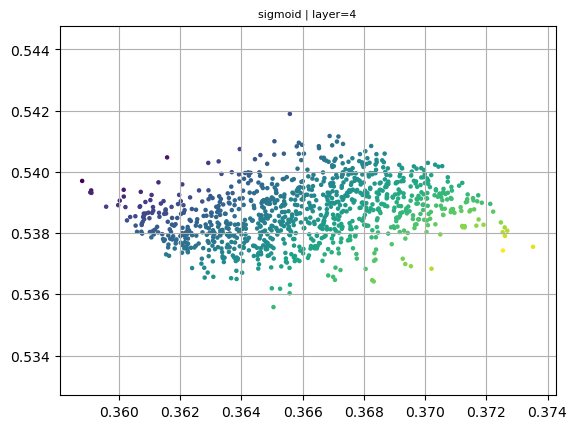

In [55]:
# deeper network with random weights
show_scatterplot(X, colors, title='x')
n_hidden = 200
n_layer = 3


inp = tf.keras.Input(shape=(2,))
x = tf.keras.layers.Dense(2, activation="sigmoid")(inp)
activations = [x]
for i in range(n_layer):
    if i < n_layer - 1:
        x = tf.keras.layers.Dense(n_hidden, activation="sigmoid")(x)
    else:
        x = tf.keras.layers.Dense(n_hidden)(x)
    activations.append(x)
model = tf.keras.Model(inp, activations)
model.compile()
Ys = model(X)
for i, Y in enumerate(Ys):
    show_scatterplot(Y, colors, title=f'sigmoid | layer={i+1}')


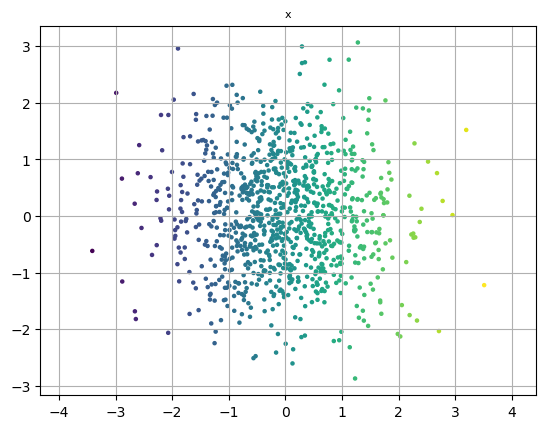

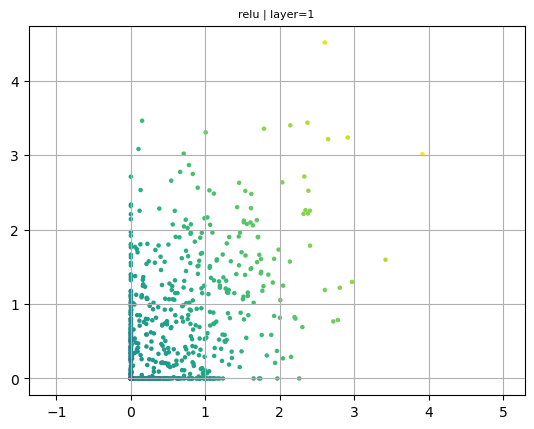

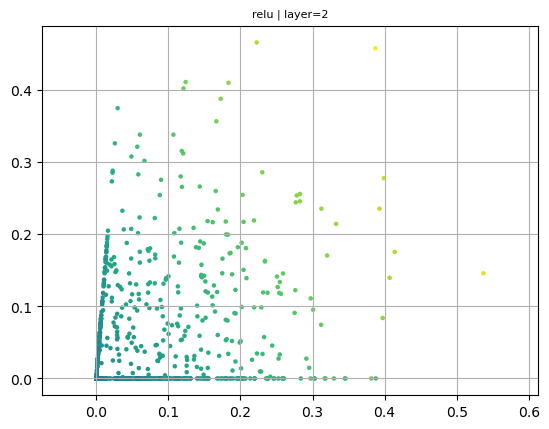

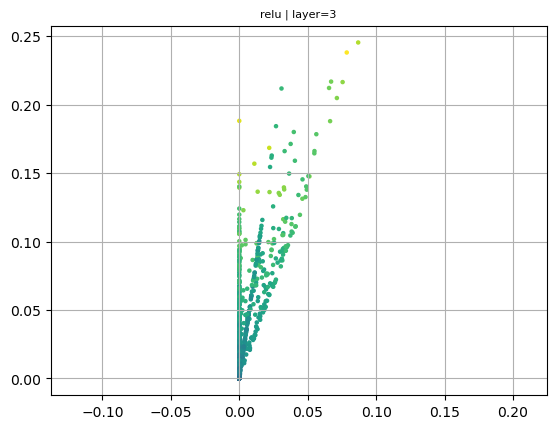

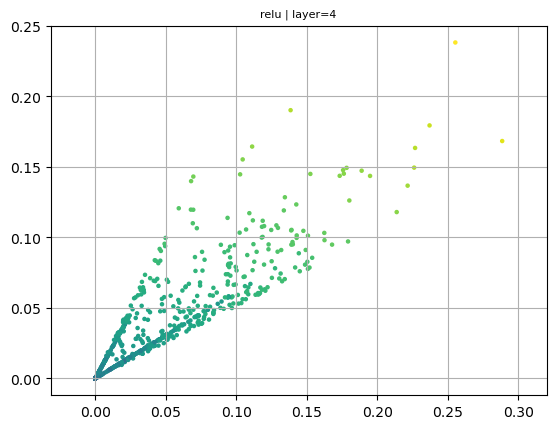

In [53]:
# deeper network with random weights
show_scatterplot(X, colors, title='x')
n_hidden = 200
n_layer = 3


inp = tf.keras.Input(shape=(2,))
x = tf.keras.layers.Dense(2, activation="relu")(inp)
activations = [x]
for i in range(n_layer):
    if i < n_layer - 1:
        x = tf.keras.layers.Dense(n_hidden, activation="relu")(x)
    else:
        x = tf.keras.layers.Dense(n_hidden)(x)
    activations.append(x)
model = tf.keras.Model(inp, activations)
model.compile()
Ys = model(X)
for i, Y in enumerate(Ys):
    show_scatterplot(Y, colors, title=f'relu | layer={i+1}')
